In [0]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
np.set_printoptions(threshold=sys.maxsize)
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from pandas import ExcelWriter
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
data = pd.read_csv('/content/Dataset_Prototype.csv')
data.head()

,VS,ACS712,DHT22,LDR,Relay,Target
0,399,392,1023,22,157,0
1,266,305,1023,23,134,0
2,231,279,1023,23,124,0
3,221,272,1023,23,120,0
4,219,272,1022,23,118,0


In [4]:
list=data.loc[:,['Target']]
list1=list.values
target=data['Target']
target.head()
target=target.to_numpy()
print(target.shape)

(1199,)


In [6]:
data=data.drop('Target',axis=1)
data.head()
data=data.to_numpy()
print(data.shape)

(1199, 5)


In [7]:
std_data = MinMaxScaler().fit_transform(data)
std_data.shape

(1199, 5)

In [12]:
#Principal Component Analysis
pca = PCA(n_components = 2)
p=pca.fit_transform(std_data)
ev1 = pca.explained_variance_ratio_
print(ev1*100)

[85.31105021 14.5480805 ]


In [13]:
#Kernel Principal Component Analysis
transformer = KernelPCA(n_components=2, kernel='linear')
X_transformed = transformer.fit_transform(std_data)
print(X_transformed.shape)
explained_variance = np.var(X_transformed, axis=0)
ev2 = explained_variance / np.sum(explained_variance)
print(ev2*100)

(1199, 2)
[85.43139681 14.56860319]


In [14]:
print(type(ev1))
ev1=ev1*100
print(type(ev2))
ev2=ev2*100

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


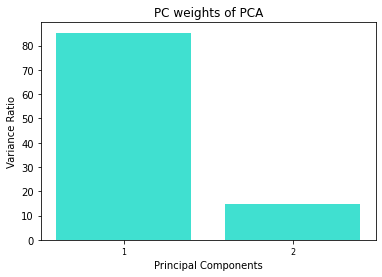

In [16]:
#To plot the weights of PCA
plt.bar([1,2],ev1,label='Principal Components',color='turquoise')
plt.xlabel('Principal Components')
pc=[1,2]
plt.xticks(pc, fontsize=8)
plt.ylabel('Variance Ratio')
plt.title('PC weights of PCA')
plt.show()

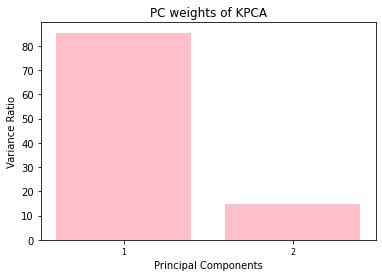

In [17]:
#To plot the weights of KPCA
plt.bar([1,2],ev2,label='Principal Components',color='pink')
plt.xlabel('Principal Components')
pc=[1,2]
plt.xticks(pc, fontsize=8)
plt.ylabel('Variance Ratio')
plt.title('PC weights of KPCA')
plt.show()

In [0]:
#Converting to Dataframe
a=pd.DataFrame(p)
b=pd.DataFrame(X_transformed)

In [0]:
#To write the output PCA values
writer=ExcelWriter('Dataset_PCA_Prototype.xlsx')
a.to_excel(writer)
writer.save()

In [0]:
#To write the output KPCA values
writer=ExcelWriter('Dataset_KPCA_Prototype.xlsx')
b.to_excel(writer)
writer.save()